In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [87]:
df = pd.read_csv('Responses.csv', encoding = 'latin1')

In [89]:
df.head()

,Name,AgeGroup,Gender,Hobbies,Frequency,HoursPerWeek,StressLevel,MoodEffect,Benefits,SocialContext,MentalHealth
0,Isha,18-24,Female,"Creative, Social",Several times a week,1 to 3 hours,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,8
1,Aditya,18-24,Male,"Intellectual, Others",Several times a week,4 to 7 hours,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,8
2,Ayush,18-24,Male,"Physical, Intellectual, Social",Weekly,8+ hours,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,10
3,Samrat,18-24,Male,"Creative, Physical, Intellectual",Daily,8+ hours,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,Kashish,18-24,Female,Physical,Less frequently,Less than 1 hour,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,8


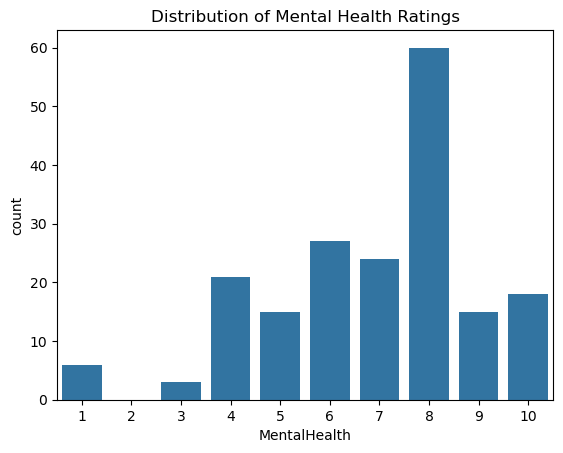

In [65]:
sns.countplot(x='MentalHealth',data=df , order = range(1,11))
plt.title("Distribution of Mental Health Ratings")
plt.show()

In [79]:
print(df['MentalHealth'].value_counts().sort_index())

MentalHealth
1      6
3      3
4     21
5     15
6     27
7     24
8     60
9     15
10    18
Name: count, dtype: int64


In [53]:
print(df['MentalHealth'].min())
print(df['MentalHealth'].max())

1
10


In [91]:
df2 = df
hobbieslist = df2['Hobbies'].tolist()
Creative = [0]*df2.shape[0]
Social = [0]*df2.shape[0]
Physical = [0]*df2.shape[0]
Intellectual = [0]*df2.shape[0]
Others = [0]*df2.shape[0]
for i in range(len(hobbieslist)):
    hobbies_list = str(df2.loc[i, 'Hobbies']).split(', ')
    for j in hobbies_list:
        if j == 'Creative':
            Creative[i] = 1
        elif j == 'Social':
            Social[i] = 1
        elif j == 'Physical':
            Physical[i] = 1
        elif j == 'Intellectual':
            Intellectual[i] = 1
        else:
            Others[i] = 1
df2['Creative_Hobbies'] = Creative
df2['Social_Hobbies'] = Social
df2['Physical_Hobbies'] = Physical
df2['Intellectual_Hobbies'] = Intellectual
df2['Other_Hobbies'] = Others
df2.drop(columns = 'Hobbies',inplace = True)
df2.head()

,Name,AgeGroup,Gender,Frequency,HoursPerWeek,StressLevel,MoodEffect,Benefits,SocialContext,MentalHealth,Creative_Hobbies,Social_Hobbies,Physical_Hobbies,Intellectual_Hobbies,Other_Hobbies
0,Isha,18-24,Female,Several times a week,1 to 3 hours,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,8,1,1,0,0,0
1,Aditya,18-24,Male,Several times a week,4 to 7 hours,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,8,0,0,0,1,1
2,Ayush,18-24,Male,Weekly,8+ hours,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,10,0,1,1,1,0
3,Samrat,18-24,Male,Daily,8+ hours,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3,1,0,1,0,1
4,Kashish,18-24,Female,Less frequently,Less than 1 hour,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,8,0,0,0,0,1


In [93]:
benefitlist = df2['Benefits'].tolist()
Relaxation = [0]*df2.shape[0]
ImprovedFocus = [0]*df2.shape[0]
ReducedStress = [0]*df2.shape[0]
IncreasedHappiness = [0]*df2.shape[0]
for i in range(len(benefitlist)):
    benefits_list = str(df2.loc[i, 'Benefits']).split(', ')
    for j in hobbies_list:
        if j == 'Relaxation':
            Relaxation[i] = 1
        elif j == 'Improved Focus':
            ImprovedStress[i] = 1
        elif j == 'Reduced Stress':
            ReducedStress[i] = 1
        elif j == 'Increased Happiness':
            IncreasedHappiness[i] = 1
        else:
            Others[i] = 1
df2['Relaxation_Benefit'] = Creative
df2['Improved_Focus_Benefit'] = Social
df2['Physical_Hobbies'] = Physical
df2['Intellectual_Hobbies'] = Intellectual
df2['Other_Hobbies'] = Others
df2.drop(columns = 'Benefits',inplace = True)
df2.head()

,Name,AgeGroup,Gender,Frequency,HoursPerWeek,StressLevel,MoodEffect,SocialContext,MentalHealth,Creative_Hobbies,Social_Hobbies,Physical_Hobbies,Intellectual_Hobbies,Other_Hobbies,Relaxation_Benefit,Improved_Focus_Benefit
0,Isha,18-24,Female,Several times a week,1 to 3 hours,Low,Improves my mood,With friends or groups,8,1,1,0,0,1,1,1
1,Aditya,18-24,Male,Several times a week,4 to 7 hours,Moderate,Improves my mood,Alone,8,0,0,0,1,1,0,0
2,Ayush,18-24,Male,Weekly,8+ hours,Moderate,Improves my mood,Both equally,10,0,1,1,1,1,0,1
3,Samrat,18-24,Male,Daily,8+ hours,High,Improves my mood,With friends or groups,3,1,0,1,0,1,1,0
4,Kashish,18-24,Female,Less frequently,Less than 1 hour,Moderate,Improves my mood,Both equally,8,0,0,0,0,1,0,0


In [95]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns = ['MentalHealth','Name'])
y = df2['MentalHealth']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
type(X_train)

pandas.core.frame.DataFrame

In [15]:
df2['AgeGroup'].unique()

array(['18-24', '14-17', '25-34', '45-54', '35-44'], dtype=object)

In [97]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
def encoder1(var):
    frequencyencoder = OrdinalEncoder(categories=[['Daily', 'Several times a week', 'Weekly','Less frequently','Monthly']])
    moodencoder = OrdinalEncoder(categories = [['Worsens my mood','No noticeable change','Improves my mood']])
    ageencoder = OrdinalEncoder(categories = [['14-17','18-24','25-34','35-44','45-54']])
    var[['Frequency']] = frequencyencoder.fit_transform(var[['Frequency']])
    var[['MoodEffect']] = moodencoder.fit_transform(var[['MoodEffect']])
    var[['AgeGroup']] = ageencoder.fit_transform(var[['AgeGroup']])
    return var
def encoder2(var):
    hoursencoder = OrdinalEncoder(categories=[['Less than 1 hour' , '1 to 3 hours' , '4 to 7 hours' , '8+ hours']])
    stressencoder = OrdinalEncoder(categories=[['Low' , 'Moderate' , 'High']])
    genderencoder = LabelEncoder()
    socialencoder = OrdinalEncoder(categories = [['Alone', 'Both equally', 'With friends or groups']])
    var[['HoursPerWeek']] = hoursencoder.fit_transform(var[['HoursPerWeek']])
    var[['StressLevel']] = stressencoder.fit_transform(var[['StressLevel']])
    var['Gender'] = genderencoder.fit_transform(var['Gender'])
    var[['SocialContext']] = socialencoder.fit_transform(var[['SocialContext']])
    return var
transformer1 = FunctionTransformer(encoder1)
transformer2 = FunctionTransformer(encoder2)
pipe = Pipeline([('Encoder1', transformer1),('Encoder2' , transformer2)])

In [99]:
X_train = pipe.fit_transform(X_train)

In [101]:
X_test = pipe.fit_transform(X_test)

In [103]:
X_test.head()

,AgeGroup,Gender,Frequency,HoursPerWeek,StressLevel,MoodEffect,SocialContext,Creative_Hobbies,Social_Hobbies,Physical_Hobbies,Intellectual_Hobbies,Other_Hobbies,Relaxation_Benefit,Improved_Focus_Benefit
184,3.0,0,1.0,0.0,1.0,2.0,1.0,0,0,0,1,1,0,0
163,1.0,1,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0
18,2.0,1,0.0,2.0,1.0,2.0,0.0,0,0,0,0,1,0,0
15,1.0,0,1.0,1.0,0.0,2.0,1.0,0,0,1,0,1,0,0
67,1.0,0,3.0,0.0,1.0,2.0,1.0,0,0,0,0,1,0,0


In [105]:
X_train.head()

,AgeGroup,Gender,Frequency,HoursPerWeek,StressLevel,MoodEffect,SocialContext,Creative_Hobbies,Social_Hobbies,Physical_Hobbies,Intellectual_Hobbies,Other_Hobbies,Relaxation_Benefit,Improved_Focus_Benefit
177,1.0,1,1.0,3.0,0.0,2.0,2.0,0,0,1,0,1,0,0
46,1.0,1,2.0,1.0,0.0,2.0,2.0,0,0,0,0,1,0,0
95,1.0,1,0.0,1.0,1.0,2.0,0.0,0,0,0,0,1,0,0
82,4.0,0,0.0,0.0,1.0,2.0,0.0,0,0,0,0,1,0,0
180,1.0,1,2.0,1.0,0.0,2.0,2.0,0,0,1,0,1,0,0


In [129]:
clf = tree.DecisionTreeClassifier(class_weight = 'balanced')
clf = clf.fit(X_train, y_train)

In [109]:
y_pred = clf.predict(X_test)

for pred, actual in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {actual}")

Predicted: 4, Actual: 4
Predicted: 10, Actual: 10
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8
Predicted: 4, Actual: 8
Predicted: 8, Actual: 7
Predicted: 8, Actual: 7
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 8, Actual: 6
Predicted: 6, Actual: 6
Predicted: 3, Actual: 3
Predicted: 9, Actual: 9
Predicted: 9, Actual: 9
Predicted: 8, Actual: 6
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 6, Actual: 8
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 10, Actual: 10
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 4, Actual: 8
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 4, Actual: 4
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 4, Actual: 8
Predic

In [165]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8253968253968254


In [115]:
plt.figure(figsize=(200,50))
tree.plot_tree(clf, filled = True,rounded=True, fontsize=10)
plt.savefig('foo.png')

In [123]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [147]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [149]:
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [169]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(class_weight='balanced'),
 'n_jobs': None,
 'param_grid': {'max_depth': [3, 5, 10, None],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'criterion': ['gini', 'entropy']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [151]:
grid.fit(X_train, y_train)

C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [159]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8409230769230769
